In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('cereal.csv')
data.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Feature Engineering 1 - Remove unwanted features

In [3]:
data = data.drop(['name','rating'],axis=1)
data.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


# Feature Engineering 2 - Check for missing values

    - Here we see if there are any features with any missing values; none on this dataset so we are good

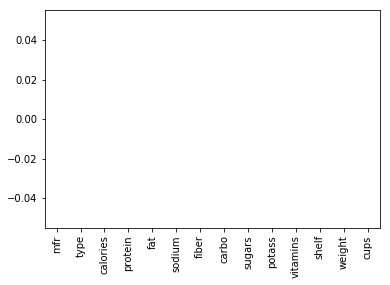

In [4]:
data.isnull().sum().plot(kind='bar')

# Feature Engineering 2 - Handle Categorical features

    - Here see that there are two categorical features in the dataset; 'mfr' and 'type'
    - We first check the different values these features have and then decide which encoding to use


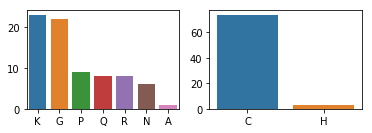

In [5]:
import seaborn as sns

plt.plot([1,2,3])
plt.subplot(221)
mfr_counts = data['mfr'].value_counts()
sns.barplot(mfr_counts.index, mfr_counts.values)

plt.subplot(222)
type_counts = data ['type'].value_counts()
sns.barplot(type_counts.index, type_counts.values)

## Findings:
    - We see that for 'mfr' feature most datapoints/cereals have a value of K & G
    - We will go ahead and dummy encode the mfr feature
    
    - We see that for 'type' feature all datapoints have either a value of C or H
    - We can simply replace C with 0 and H with 1

In [6]:
encoded_mfr = pd.get_dummies(data['mfr'], prefix='mfr', prefix_sep='_')
encoded_mfr_df = pd.DataFrame(data=encoded_mfr)
encoded_mfr_df.head()

encoded_data = pd.concat([data, encoded_mfr_df],axis=1)
encoded_data = encoded_data.drop(['mfr'],axis=1)

encoded_data['type'] = encoded_data['type'].replace('C',0)
encoded_data['type'] = encoded_data['type'].replace('H',0)

encoded_data.head(5)

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0,0,0,0,0,0,1


# Feature Engineering 3 - Scaling Data

    - We can see that some of the features need to be scaled as their values vary a lot and are not consistent


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#cols_to_scale = ['calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf']
partial_scaled_data = scaler.fit_transform(encoded_data[['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf']])
partial_scaled_data_df = pd.DataFrame(data=partial_scaled_data, columns=['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf'])

#remove unencoded values from the dataframe
encoded_data = encoded_data.drop(['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf'],axis=1)
scaled_data = pd.concat([encoded_data, partial_scaled_data_df],axis=1)
scaled_data.head(5)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\MachineLearning\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,type,weight,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,sugars,calories,protein,fat,sodium,fiber,carbo,potass,vitamins,cups,shelf
0,0,1.0,0,0,0,1,0,0,0,-0.208807,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,2.596948,-0.14627,-2.123870,0.957813
1,0,1.0,0,0,0,0,0,1,0,0.244099,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.549573,-1.27255,0.774053,0.957813
2,0,1.0,0,0,1,0,0,0,0,-0.435260,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,3.161741,-0.14627,-2.123870,0.957813
3,0,1.0,0,0,1,0,0,0,0,-1.567525,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,3.302939,-0.14627,-1.388576,0.957813
4,0,1.0,0,0,0,0,0,0,1,0.244099,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.140530,-1.370723,-0.14627,-0.307262,0.957813


# 1) KMeans Clustering (k=5)

    - Here we will cluster the data into 5 different clusters
    - We plot data distribution across clusters and measure the Silhouette score
    - This value ranges from -1 to 1 with a higher value indicating better clustering
    - Good read at https://en.wikipedia.org/wiki/Silhouette_(clustering)

Shape of original dataset was  (77, 14)
Number of features in original dataset was  14


Shape of engineered dataset is  (77, 20)
Number of features in engineered dataset is  20


Silhoutte score for k=5 is  0.22027869376066667


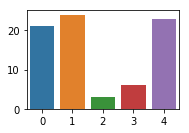

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print ('Shape of original dataset was ', data.shape)
print ('Number of features in original dataset was ', data.shape[1])
print ('\n')

print ('Shape of engineered dataset is ', scaled_data.shape)
print ('Number of features in engineered dataset is ', scaled_data.shape[1])
print ('\n')

kMeans = KMeans(n_clusters=5, precompute_distances=False, init='k-means++', random_state=100)
model5k = kMeans.fit(scaled_data)
model5k_clusters = kMeans.fit_transform(scaled_data)

# Draw a barplot to seee how the datapoints have been categorised into different clusters
plt.plot([1,2,3])

plt.subplot(221)
count, label = np.unique(model5k.labels_, return_counts=True)
sns.barplot(count, label)

print ('Silhoutte score for k=5 is ', silhouette_score(scaled_data, model5k.labels_))

## Evaluate our KMeans model

    - There are two metrics which we would be using
    - Inertia & Silhoutte score - for different values of cluster counts
    - Lower values of Inertia represents a good fit (Inertia is sum of squared difference b/w each point and it's centroid)
    - Higher values of Silhoutte score represents a good fit
    
    - After running the code we see that the data is best clustered in 6 clusters
    
    - Note: KMeans is suspectible to randomness. As the random state changes the clustering outcome will change as well. One of the ways to deal with is to do 'n' number of initializations; this is specified by n_init parameter

In [9]:
import datetime
clusters = [2,3,4,5,6,7,8]
kmeans_silhoutte_scores = []
kmeans_inertia_scores = []

tic = datetime.datetime.now()

for cluster in clusters:
    
    kMeans = KMeans(n_clusters=cluster, precompute_distances=False, init='k-means++', n_init=100, random_state=100)
    model = kMeans.fit(scaled_data)
    model_clusters = model.transform(scaled_data)

    kmeans_silhoutte_scores.append(silhouette_score(scaled_data, model.labels_))
    kmeans_inertia_scores.append(model.inertia_)

toc = datetime.datetime.now()
print ('Training completed in %s seconds'%(toc-tic))

Training completed in 0:00:01.480543 seconds


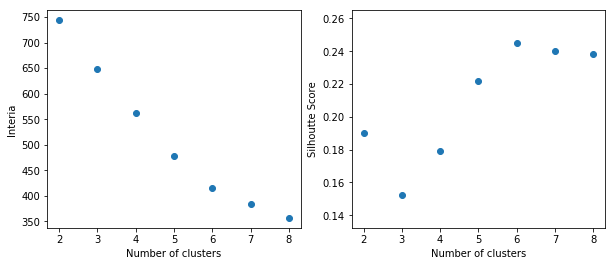

In [10]:
plt.figure(figsize=(10,4))
plt.subplots_adjust()

plt.subplot(121)
plt.scatter(x=clusters, y=kmeans_inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Interia')

plt.subplot(122)
plt.scatter(x=clusters, y=kmeans_silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.show()

# 2) MiniBatchKMeans

    # The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm

In [11]:
import datetime
from sklearn.cluster import MiniBatchKMeans

clusters = [2,3,4,5,6,7,8]
minibatch_silhoutte_scores = []
minbatch_inertia_scores = []

tic = datetime.datetime.now()

for cluster in clusters:
    
    kMeans = MiniBatchKMeans(n_clusters=cluster, n_init=100, random_state=100)
    model = kMeans.fit(scaled_data)
    model_clusters = model.transform(scaled_data)

    minibatch_silhoutte_scores.append(silhouette_score(scaled_data, model.labels_))
    minbatch_inertia_scores.append(model.inertia_)

toc = datetime.datetime.now()
print ('Training completed in %s seconds'%(toc-tic))

Training completed in 0:00:01.253616 seconds


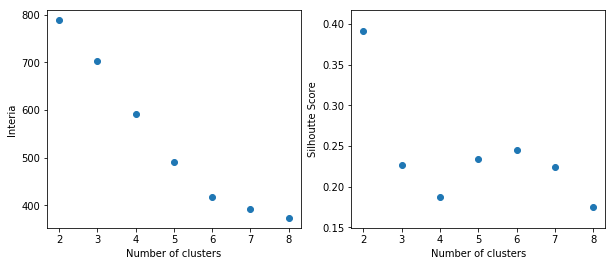

In [12]:
plt.figure(figsize=(10,4))
plt.subplots_adjust()

plt.subplot(121)
plt.scatter(x=clusters, y=minbatch_inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Interia')

plt.subplot(122)
plt.scatter(x=clusters, y=minibatch_silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.show()

## Comparision of KMeans & MiniBatchKMeans

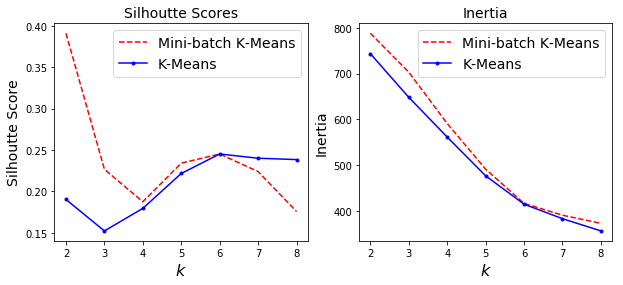

In [13]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(clusters, minibatch_silhoutte_scores, "r--", label="Mini-batch K-Means")
plt.plot(clusters, kmeans_silhoutte_scores, "b.-", label="K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Silhoutte Score", fontsize=14)
plt.title("Silhoutte Scores", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(clusters, minbatch_inertia_scores, "r--", label="Mini-batch K-Means")
plt.plot(clusters, kmeans_inertia_scores, "b.-", label="K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)


plt.show()

# Summary

    - In Summary we can see that perhaps the dataset is best divided into 6 clusters.
    - Inertia score for 6 clusters follows a nice elbow model
    - Silhoutte score for 6 clusters is high as well.
    
    Arguably the Silhoutte score for 2 clusters is maximum for K-Means clustering, however the inertia value is also very high.
    
    - Very good tutorial available at https://www.youtube.com/watch?v=7Qv0cmJ6FsI